In [2690]:
import pandas as pd
import numpy as np
import category_encoders as ce
from matplotlib import pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
import datetime
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from datetime import date
from datetime import timedelta
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2691]:
import warnings
warnings.filterwarnings('ignore')

In [2692]:
pd.set_option('display.max_rows', 25000)
pd.set_option('display.max_columns', 25000)

Load dataset

In [2693]:
mortgage_load_df = pd.read_csv('Mortgage.csv')
mortgage_load_df.head(5)

,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic
0,Mr. Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516
1,Joel Allen,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311
2,Mr. Craig Marc Davis,1979-02-10,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646
3,Mr. Brandon Thornton,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721
4,Miss Brett Carol Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409


In [2694]:
mortgage_load_df.shape

(32561, 18)

In [2695]:
mortgage_df = mortgage_load_df.copy()
mortgage_df.isnull().sum()

full_name                     0
dob                           0
town                          0
paye                          0
salary_band                   0
years_with_employer           0
months_with_employer          0
hours_per_week                0
capital_gain                  0
capital_loss                  0
new_mortgage                  0
sex                           0
religion                      0
relationship                  0
race                          0
native_country                0
workclass                     0
demographic_characteristic    0
dtype: int64

In [2696]:
mortgage_df.shape

(32561, 18)

Drop full_name

In [2697]:
mortgage_df.drop('full_name', axis=1, inplace = True)
mortgage_df.head()

,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic
0,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516
1,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311
2,1979-02-10,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646
3,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721
4,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409


Calculate age by keeping 2018 as the reference year

In [2698]:
today = date.today()
year = today.year
year = 2018

In [2699]:
mortgage_df['dob'] = pd.to_datetime(mortgage_df['dob'])
mortgage_df['age'] = year - pd.DatetimeIndex(mortgage_df['dob']).year
mortgage_df.drop('dob', axis=1, inplace = True)
mortgage_df.head()

,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,age
0,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,39
1,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,50
2,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646,39
3,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721,53
4,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409,28


Frequency encode town

In [2700]:
freq = mortgage_df.groupby('town').size()/len(mortgage_df)  
# mapping values to dataframe
mortgage_df.loc[:, "{}_freq_encode".format('town')] = mortgage_df['town'].map(freq)  
# drop original column.
#mortgage_df = mortgage_df.drop(['town'], axis = 1) 
mortgage_df.head()

,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,age,town_freq_encode
0,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,39,0.599582
1,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,50,0.046958
2,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646,39,0.599582
3,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721,53,0.599582
4,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409,28,0.161482


In [2701]:
mortgage_df.shape

(32561, 18)

In [2702]:
mortgage_df.isnull().sum()

town                          0
paye                          0
salary_band                   0
years_with_employer           0
months_with_employer          0
hours_per_week                0
capital_gain                  0
capital_loss                  0
new_mortgage                  0
sex                           0
religion                      0
relationship                  0
race                          0
native_country                0
workclass                     0
demographic_characteristic    0
age                           0
town_freq_encode              0
dtype: int64

In [2703]:
mortgage_df.shape

(32561, 18)

Apply neccessary cleaning and transformations on salary_band

In [2704]:
mortgage_df['salary_band_new'] = mortgage_df['salary_band'].astype(str).str.lower()
mortgage_df['salary_band_new'].replace({' yearly': '', '£':''}, regex=True, inplace=True)
mortgage_df['salary_band_new'].replace({' pw': ' * 52', ' per month':' * 12'}, regex=True, inplace=True)
mortgage_df['salary_band_new'].replace({' range': '', ' - ': ' + '}, regex=True, inplace=True)
mortgage_df['salary_band_new'].replace({'^[a-z]+$': 0}, regex=True, inplace=True)
mortgage_df.loc[mortgage_df.astype(str).salary_band_new.str.contains('\+'),'salary_band_new'] = '(' + mortgage_df['salary_band_new'].astype(str) + ') / 2'

In [2705]:
mortgage_df['currency'] = mortgage_df['salary_band_new'].str[-3:]
mortgage_df[['salary_band','salary_band_new','currency']].tail(5)

,salary_band,salary_band_new,currency
32556,£19073 yearly,19073,073
32557,266309946.37SOS,266309946.37sos,sos
32558,£1752.24 per month,1752.24 * 12,12
32559,£24848 yearly,24848,848
32560,£2935.51 per month,2935.51 * 12,12


In [2706]:
mortgage_df['currency'] = mortgage_df['currency'].fillna('gbp')
mortgage_df['currency'].replace({'[^a-z]+$': 'gbp'}, regex=True, inplace=True)
mortgage_df['salary_band_new'].replace({'[a-z]+$': ''}, regex=True, inplace=True)
mortgage_df['salary_band_new'] = mortgage_df['salary_band_new'].astype(str)
mortgage_df.head()

,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,age,town_freq_encode,salary_band_new,currency
0,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,39,0.599582,18109,gbp
1,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,50,0.046958,16945,gbp
2,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646,39,0.599582,729.87 * 52,gbp
3,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721,53,0.599582,19087,gbp
4,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409,28,0.161482,2741.5 * 12,gbp


In [2707]:
mortgage_df['salary_band_new'] = mortgage_df['salary_band_new'].apply(lambda x: eval(x) if (pd.notnull(x)) else x)
mortgage_df.head()

,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,age,town_freq_encode,salary_band_new,currency
0,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,39,0.599582,18109.00,gbp
1,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,50,0.046958,16945.00,gbp
2,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646,39,0.599582,37953.24,gbp
3,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721,53,0.599582,19087.00,gbp
4,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409,28,0.161482,32898.00,gbp


In [2708]:
mortgage_df.isnull().sum()

town                          0
paye                          0
salary_band                   0
years_with_employer           0
months_with_employer          0
hours_per_week                0
capital_gain                  0
capital_loss                  0
new_mortgage                  0
sex                           0
religion                      0
relationship                  0
race                          0
native_country                0
workclass                     0
demographic_characteristic    0
age                           0
town_freq_encode              0
salary_band_new               0
currency                      0
dtype: int64

In [2709]:
currency_conversion = pd.read_csv('currency_conversion.csv')
currency_conversion.drop('Unnamed: 0',axis = 1,inplace=True)

In [2487]:
currency_conversion.isnull().sum()

currency    0
rate        0
dtype: int64

In [2710]:
mortgage_df = pd.merge(mortgage_df,currency_conversion,on='currency',how='inner')
mortgage_df.isnull().sum()

town                          0
paye                          0
salary_band                   0
years_with_employer           0
months_with_employer          0
hours_per_week                0
capital_gain                  0
capital_loss                  0
new_mortgage                  0
sex                           0
religion                      0
relationship                  0
race                          0
native_country                0
workclass                     0
demographic_characteristic    0
age                           0
town_freq_encode              0
salary_band_new               0
currency                      0
rate                          0
dtype: int64

In [2711]:
mortgage_df = mortgage_df.assign(salary_in_gbp= lambda x:(x['salary_band_new'] / x['rate']))
mortgage_df.drop(['salary_band','salary_band_new','currency','rate'],axis=1,inplace=True)
mortgage_df.head(5)

,town,paye,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,age,town_freq_encode,salary_in_gbp
0,Edinburgh,53791313,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,39,0.599582,18109.00
1,Leeds,24005258,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,50,0.046958,16945.00
2,Edinburgh,44124649,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646,39,0.599582,37953.24
3,Edinburgh,85701281,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721,53,0.599582,19087.00
4,Swindon,BR442000,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409,28,0.161482,32898.00


In [2712]:
mortgage_df['salary_in_gbp'].describe(percentiles=[0,0.05,0.1,0.25,0.50,0.75,.80,.85,.89,.9,.91,.92,.93,.94,.95,.96,.97,.98,.99,1])

count    3.256100e+04
mean     1.968506e+10
std      1.429856e+12
min      0.000000e+00
0%       0.000000e+00
5%       1.465400e+04
10%      1.613900e+04
25%      1.889208e+04
50%      2.351500e+04
75%      3.439908e+04
80%      3.952364e+04
85%      4.683400e+04
89%      5.939779e+04
90%      6.448728e+04
91%      7.358780e+04
92%      8.770225e+04
93%      1.123292e+05
94%      1.873080e+05
95%      1.318184e+06
96%      1.041021e+07
97%      7.032105e+07
98%      6.906260e+08
99%      1.006213e+10
100%     2.381327e+14
max      2.381327e+14
Name: salary_in_gbp, dtype: float64

In [2713]:
mortgage_df['z-score'] = (mortgage_df['salary_in_gbp'] - mortgage_df['salary_in_gbp'].mean())/mortgage_df['salary_in_gbp'].std()
mortgage_df[mortgage_df['z-score'] > 3]['salary_in_gbp'].min()

5253805924845.403

In [2714]:
upper_cap = round(mortgage_df['salary_in_gbp'].quantile(0.92),2)
mortgage_df['salary_in_gbp'] = np.where(mortgage_df['salary_in_gbp']>upper_cap,upper_cap,mortgage_df.salary_in_gbp)
#mortgage_df['salary_in_gbp'][mortgage_df['salary_in_gbp'] > upper_cap] = upper_cap

In [2716]:
mortgage_df['salary_in_gbp'].describe(percentiles=[0,0.05,0.1,0.25,0.50,0.75,.80,.85,.89,.9,.91,.92,.93,.94,.95,.96,.97,.98,.99,1])

count    32561.000000
mean     31264.994948
std      20761.803024
min          0.000000
0%           0.000000
5%       14654.000000
10%      16139.000000
25%      18892.080000
50%      23515.000000
75%      34399.080000
80%      39523.640000
85%      46834.000000
89%      59397.792000
90%      64487.280000
91%      73587.800000
92%      87700.098000
93%      87702.250000
94%      87702.250000
95%      87702.250000
96%      87702.250000
97%      87702.250000
98%      87702.250000
99%      87702.250000
100%     87702.250000
max      87702.250000
Name: salary_in_gbp, dtype: float64

In [2717]:
mortgage_df['z-score'] = (mortgage_df['salary_in_gbp'] - mortgage_df['salary_in_gbp'].mean()) / mortgage_df['salary_in_gbp'].std()
mortgage_df[mortgage_df['z-score'] > 3]

,town,paye,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,age,town_freq_encode,salary_in_gbp,z-score


In [2718]:
mortgage_df[mortgage_df['salary_in_gbp'] < 0]

,town,paye,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,age,town_freq_encode,salary_in_gbp,z-score


In [2719]:
print(mortgage_df['salary_in_gbp'].skew())
print(np.log(mortgage_df['salary_in_gbp']).skew())
print(np.sqrt(mortgage_df['salary_in_gbp']).skew())

1.696651610296941
nan
0.7485514157182112


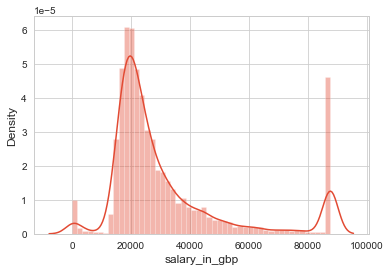

In [2720]:
sns.distplot(mortgage_df['salary_in_gbp'])
plt.show()

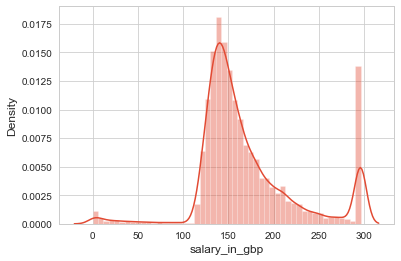

In [2721]:
sns.distplot(np.sqrt(mortgage_df['salary_in_gbp']))
plt.show()

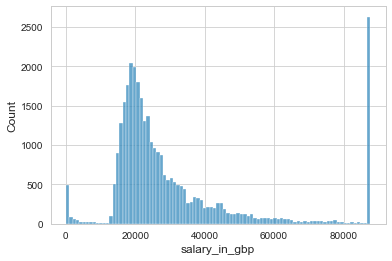

In [2722]:
sns.histplot(mortgage_df['salary_in_gbp'])
plt.show()

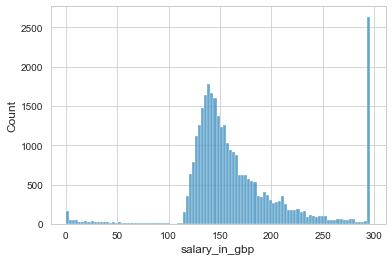

In [2723]:
sns.histplot(np.sqrt(mortgage_df['salary_in_gbp']))
plt.show()

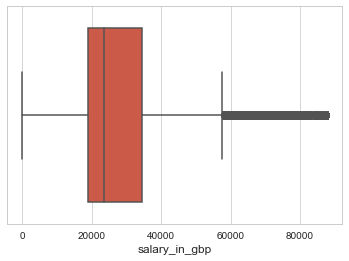

In [2724]:
sns.boxplot(mortgage_df['salary_in_gbp'])
plt.show()

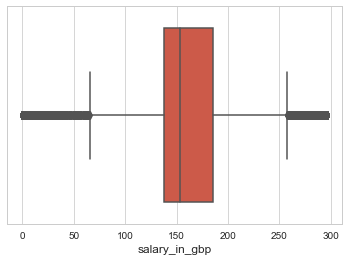

In [2725]:
sns.boxplot(np.sqrt(mortgage_df['salary_in_gbp']))
plt.show()

In [2726]:
mortgage_df['salary_in_gbp_deskewed'] = np.sqrt(mortgage_df['salary_in_gbp'])

In [2727]:
mortgage_df.drop('paye',axis=1,inplace=True)
mortgage_df.head()

,town,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,age,town_freq_encode,salary_in_gbp,z-score,salary_in_gbp_deskewed
0,Edinburgh,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,39,0.599582,18109.00,-0.633663,134.569685
1,Leeds,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,50,0.046958,16945.00,-0.689728,130.172962
2,Edinburgh,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646,39,0.599582,37953.24,0.322142,194.815913
3,Edinburgh,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721,53,0.599582,19087.00,-0.586558,138.155709
4,Swindon,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409,28,0.161482,32898.00,0.078654,181.378058


In [2728]:
mortgage_df['net_profit'] = mortgage_df['capital_gain'] - mortgage_df['capital_loss']
mortgage_df.drop(['capital_gain','capital_loss'],axis=1,inplace=True)
mortgage_df['net_profit'].describe(percentiles=[0,0.05,0.1,0.25,0.50,0.75,.80,.85,.89,.9,.91,.92,.93,.94,.95,.96,.97,.98,.99,1])

count    32561.000000
mean       990.345014
std       7408.986951
min      -4356.000000
0%       -4356.000000
5%           0.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          0.000000
89%          0.000000
90%          0.000000
91%          0.000000
92%       1458.200000
93%       2885.000000
94%       3818.000000
95%       5013.000000
96%       7298.000000
97%       7688.000000
98%      14084.000000
99%      15024.000000
100%     99999.000000
max      99999.000000
Name: net_profit, dtype: float64

In [2729]:
len(mortgage_df[mortgage_df['net_profit']<0])

1519

In [2730]:
print(mortgage_df['net_profit'].skew())
print(np.log(mortgage_df['net_profit']).skew())
print(np.sqrt(mortgage_df['net_profit']).skew())

11.87193391898442
nan
5.7466749131354895


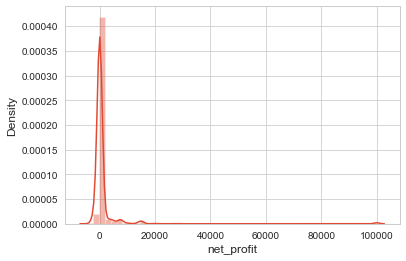

In [2731]:
sns.distplot(mortgage_df['net_profit'])
plt.show()

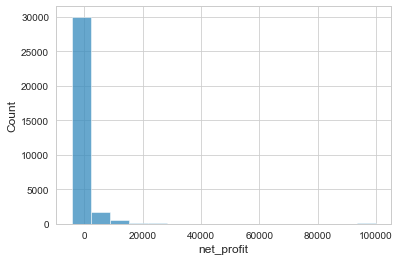

In [2732]:
sns.histplot(mortgage_df['net_profit'])
plt.show()

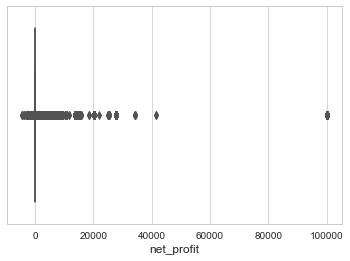

In [2733]:
sns.boxplot(mortgage_df['net_profit'])
plt.show()

In [2734]:
mortgage_df['z-score'] = (mortgage_df['net_profit'] - mortgage_df['net_profit'].mean()) / mortgage_df['net_profit'].std()
mortgage_df[mortgage_df['z-score'] > 2]['net_profit'].min()

15831

In [2735]:
upper_cap = round(mortgage_df['net_profit'].quantile(0.97),2)
mortgage_df['net_profit'][mortgage_df['net_profit'] > upper_cap] = upper_cap

In [2736]:
print(mortgage_df['net_profit'].skew())
print(np.log(mortgage_df['net_profit']).skew())
print(np.sqrt(mortgage_df['net_profit']).skew())

3.2438015617286515
nan
3.176270007870102


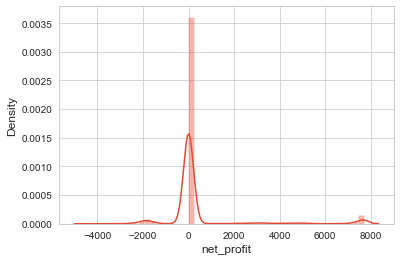

In [2737]:
sns.distplot(mortgage_df['net_profit'])
plt.show()

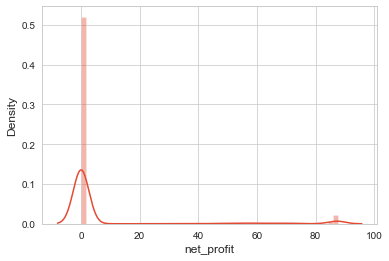

In [2738]:
sns.distplot(np.sqrt(mortgage_df['net_profit']))
plt.show()

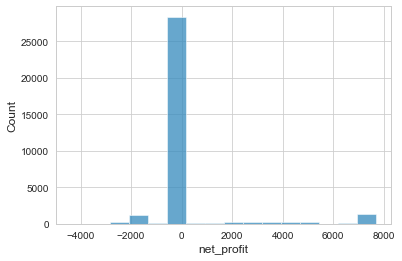

In [2739]:
sns.histplot(mortgage_df['net_profit'])
plt.show()

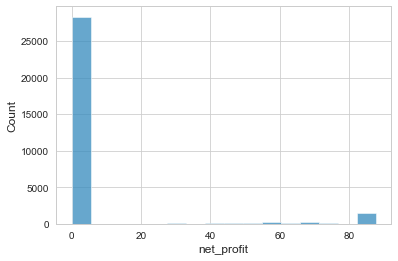

In [2740]:
sns.histplot(np.sqrt(mortgage_df['net_profit']))
plt.show()

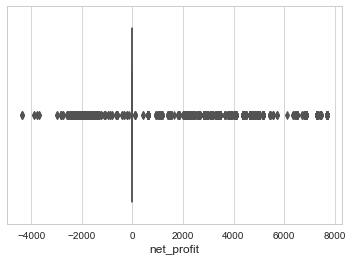

In [2741]:
sns.boxplot(mortgage_df['net_profit'])
plt.show()

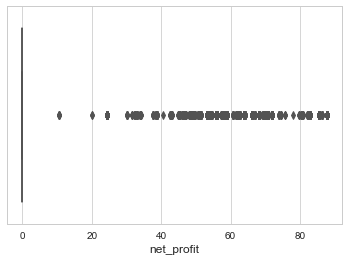

In [2742]:
sns.boxplot(np.sqrt(mortgage_df['net_profit']))
plt.show()

In [2743]:
mortgage_df['net_profit_deskewed'] = np.sqrt(mortgage_df['net_profit'])
mortgage_df.head()

,town,years_with_employer,months_with_employer,hours_per_week,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,age,town_freq_encode,salary_in_gbp,z-score,salary_in_gbp_deskewed,net_profit,net_profit_deskewed
0,Edinburgh,20,6,40,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,39,0.599582,18109.00,0.159759,134.569685,2174,46.626173
1,Leeds,28,1,13,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,50,0.046958,16945.00,-0.133668,130.172962,0,0.000000
2,Edinburgh,14,5,40,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646,39,0.599582,37953.24,-0.133668,194.815913,0,0.000000
3,Edinburgh,32,6,40,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721,53,0.599582,19087.00,-0.133668,138.155709,0,0.000000
4,Swindon,3,6,40,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409,28,0.161482,32898.00,-0.133668,181.378058,0,0.000000


In [2744]:
mortgage_df['net_profit'].describe(percentiles=[0,0.05,0.1,0.25,0.50,0.75,.80,.85,.89,.9,.91,.92,.93,.94,.95,.96,.97,.98,.99,1])

count    32561.000000
mean       381.609748
std       1760.078689
min      -4356.000000
0%       -4356.000000
5%           0.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
80%          0.000000
85%          0.000000
89%          0.000000
90%          0.000000
91%          0.000000
92%       1458.200000
93%       2885.000000
94%       3818.000000
95%       5013.000000
96%       7298.000000
97%       7688.000000
98%       7688.000000
99%       7688.000000
100%      7688.000000
max       7688.000000
Name: net_profit, dtype: float64

In [2745]:
mortgage_df['new_mortgage'] = 1
mortgage_df['employement_duration_years'] =  round(((mortgage_df['years_with_employer'] * 12) + (mortgage_df['months_with_employer']))/12,2)
mortgage_df.drop(['years_with_employer','months_with_employer'],axis=1,inplace=True)
mortgage_df.head()

,town,hours_per_week,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,age,town_freq_encode,salary_in_gbp,z-score,salary_in_gbp_deskewed,net_profit,net_profit_deskewed,employement_duration_years
0,Edinburgh,40,1,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,39,0.599582,18109.00,0.159759,134.569685,2174,46.626173,20.50
1,Leeds,13,1,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,50,0.046958,16945.00,-0.133668,130.172962,0,0.000000,28.08
2,Edinburgh,40,1,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646,39,0.599582,37953.24,-0.133668,194.815913,0,0.000000,14.42
3,Edinburgh,40,1,Male,Christianity,Husband,Black,United Kingdom,Private,234721,53,0.599582,19087.00,-0.133668,138.155709,0,0.000000,32.50
4,Swindon,40,1,Female,Christianity,Wife,Black,Sweden,Private,338409,28,0.161482,32898.00,-0.133668,181.378058,0,0.000000,3.50


In [2746]:
print(mortgage_df['net_profit'].skew())
print(np.log(mortgage_df['net_profit']).skew())
print(np.sqrt(mortgage_df['net_profit']).skew())

3.2438015617286515
nan
3.176270007870102


In [2747]:
mortgage_df['employement_duration_years'].describe(percentiles = [0.0,0.05,0.25,0.5,0.75,0.91,.92,.93,.94,0.95,0.97,0.99])

count    32561.000000
mean         5.630278
std          6.445163
min          0.000000
0%           0.000000
5%           0.250000
25%          1.330000
50%          3.170000
75%          7.670000
91%         14.920000
92%         15.830000
93%         16.830000
94%         17.920000
95%         19.250000
97%         22.670000
99%         29.580000
max         57.920000
Name: employement_duration_years, dtype: float64

In [2748]:
mortgage_df['z-score'] = (mortgage_df['employement_duration_years'] - mortgage_df['employement_duration_years'].mean()) / mortgage_df['employement_duration_years'].std()
mortgage_df[mortgage_df['z-score'] > 3]['employement_duration_years'].min()

25.0

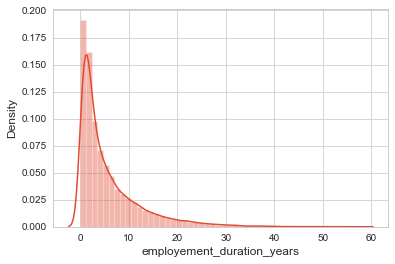

In [2749]:
sns.distplot(mortgage_df['employement_duration_years'])
plt.show()

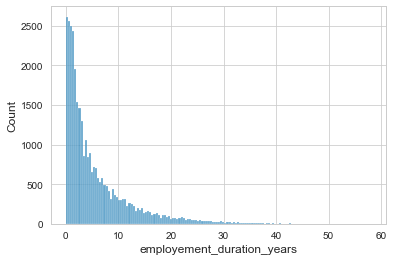

In [2750]:
sns.histplot(mortgage_df['employement_duration_years'])
plt.show()

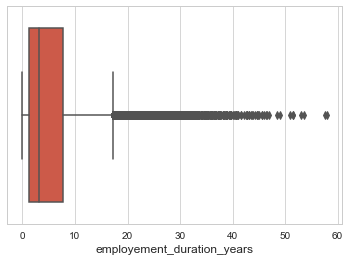

In [2751]:
sns.boxplot(mortgage_df['employement_duration_years'])
plt.show()

In [2752]:
upper_cap = round(mortgage_df['employement_duration_years'].quantile(0.97),2)
mortgage_df['employement_duration_years'][mortgage_df['employement_duration_years'] > upper_cap] = upper_cap

In [2753]:
print(mortgage_df['employement_duration_years'].skew())
print(np.log(mortgage_df['employement_duration_years']).skew())
print(np.sqrt(mortgage_df['employement_duration_years']).skew())

1.4841526994955823
nan
0.6238267872675458


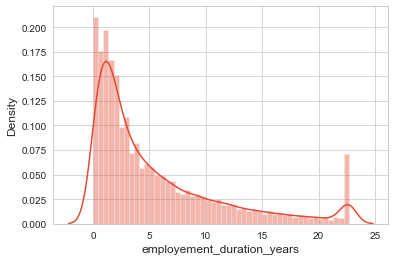

In [2754]:
sns.distplot(mortgage_df['employement_duration_years'])
plt.show()

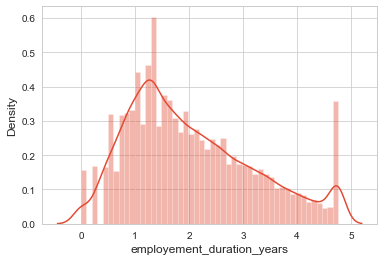

In [2755]:
sns.distplot(np.sqrt(mortgage_df['employement_duration_years']))
plt.show()

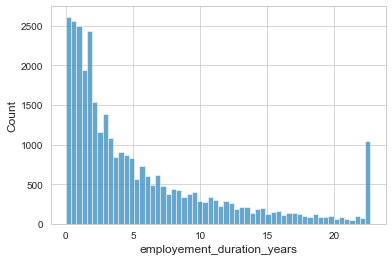

In [2756]:
sns.histplot(mortgage_df['employement_duration_years'])
plt.show()

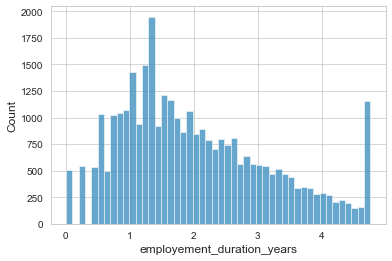

In [2757]:
sns.histplot(np.sqrt(mortgage_df['employement_duration_years']))
plt.show()

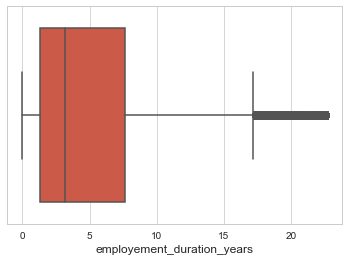

In [2758]:
sns.boxplot(mortgage_df['employement_duration_years'])
plt.show()

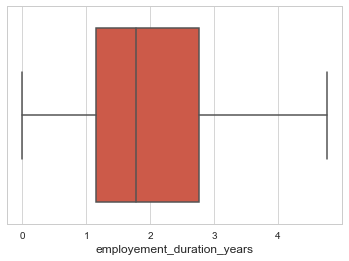

In [2759]:
sns.boxplot(np.sqrt(mortgage_df['employement_duration_years']))
plt.show()

In [2760]:
mortgage_df['employement_duration_years_deskewed'] = np.sqrt(mortgage_df['employement_duration_years'])

In [2761]:
mortgage_df['z-score'] = (mortgage_df['employement_duration_years'] - mortgage_df['employement_duration_years'].mean()) / mortgage_df['employement_duration_years'].std()
len(mortgage_df[mortgage_df['z-score'] > 3])

0

In [2762]:
mortgage_df['hours_per_week'].describe(percentiles = [0.0,0.05,0.25,0.5,0.75,0.8,0.95,0.97,0.99])

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
0%           1.000000
5%          18.000000
25%         40.000000
50%         40.000000
75%         45.000000
80%         48.000000
95%         60.000000
97%         65.000000
99%         80.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [2763]:
print(mortgage_df['hours_per_week'].skew())
print(np.log(mortgage_df['hours_per_week']).skew())
print(np.sqrt(mortgage_df['hours_per_week']).skew())

0.22764253680450103
-2.652626168329734
-0.9849133155104026


In [2764]:
mortgage_df['z-score'] = (mortgage_df['hours_per_week'] - mortgage_df['hours_per_week'].mean()) / mortgage_df['hours_per_week'].std()
len(mortgage_df[mortgage_df['z-score'] > 3])

349

In [2765]:
upper_cap = round(mortgage_df['hours_per_week'].quantile(0.97),2)
mortgage_df['hours_per_week'][mortgage_df['hours_per_week'] > upper_cap] = upper_cap

In [2766]:
print(mortgage_df['hours_per_week'].skew())
print(np.log(mortgage_df['hours_per_week']).skew())
print(np.sqrt(mortgage_df['hours_per_week']).skew())

-0.47460765019285284
-2.8570436897274156
-1.3807119301475814


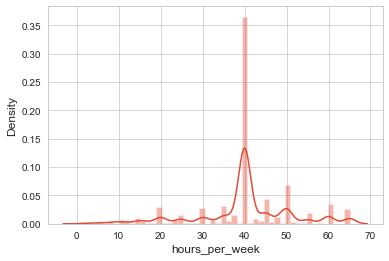

In [2767]:
sns.distplot(mortgage_df['hours_per_week'])
plt.show()

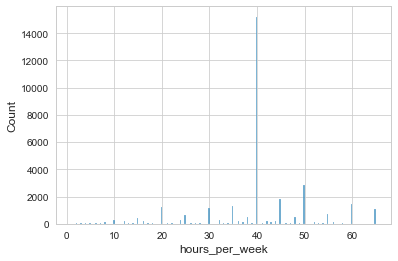

In [2768]:
sns.histplot(mortgage_df['hours_per_week'])
plt.show()

In [2769]:
substitute = {'Male' : 1, 'Female' : 0}
mortgage_df['sex'] = mortgage_df['sex'].map(substitute)

In [2770]:
print(mortgage_df['demographic_characteristic'].skew())
print(np.log(mortgage_df['demographic_characteristic']).skew())
print(np.sqrt(mortgage_df['demographic_characteristic']).skew())

1.446980094578982
-0.842480249892627
0.18911507102940306


In [2771]:
mortgage_df['demographic_characteristic'].describe(percentiles = [0.0,0.05,0.25,0.5,0.75,0.8,0.95,0.97,0.99])

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
0%       1.228500e+04
5%       3.946000e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
80%      2.598730e+05
95%      3.796820e+05
97%      4.168904e+05
99%      5.100720e+05
max      1.484705e+06
Name: demographic_characteristic, dtype: float64

In [2772]:
mortgage_df['z-score'] = (mortgage_df['demographic_characteristic'] - mortgage_df['demographic_characteristic'].mean()) / mortgage_df['demographic_characteristic'].std()
mortgage_df[mortgage_df['z-score'] > 3]['demographic_characteristic'].min()

506436

In [2773]:
upper_cap = round(mortgage_df['demographic_characteristic'].quantile(.99),2)
mortgage_df['demographic_characteristic'][mortgage_df['demographic_characteristic'] > upper_cap] = upper_cap

In [2774]:
print(mortgage_df['demographic_characteristic'].skew())
print(np.log(mortgage_df['demographic_characteristic']).skew())
print(np.sqrt(mortgage_df['demographic_characteristic']).skew())

0.7960283565403619
-0.8952135430003602
-0.00016704496723209445


In [2775]:
mortgage_df['demographic_characteristic_deskewed'] = np.sqrt(mortgage_df['demographic_characteristic'])

In [2776]:
print(mortgage_df['age'].skew())
print(np.log(mortgage_df['age']).skew())
print(np.sqrt(mortgage_df['age']).skew())

0.5577989687028027
-0.12725529088366214
0.20636874259288884


In [2777]:
mortgage_df['age'].describe(percentiles = [0.0,0.05,0.25,0.5,0.75,0.8,0.95,.96,0.97,.98,0.99])

count    32561.000000
mean        39.047112
std         13.650139
min         16.000000
0%          16.000000
5%          20.000000
25%         28.000000
50%         38.000000
75%         48.000000
80%         51.000000
95%         64.000000
96%         65.000000
97%         67.000000
98%         70.000000
99%         74.000000
max         91.000000
Name: age, dtype: float64

In [2778]:
mortgage_df['z-score'] = (mortgage_df['age'] - mortgage_df['age'].mean()) / mortgage_df['age'].std()
mortgage_df[mortgage_df['z-score'] > 3]['age'].min()

80

In [2779]:
upper_cap = round(mortgage_df['age'].quantile(.99),2)
mortgage_df['age'][mortgage_df['age'] > upper_cap] = upper_cap

In [2780]:
print(mortgage_df['age'].skew())
print(np.log(mortgage_df['age']).skew())
print(np.sqrt(mortgage_df['age']).skew())

0.4762833515219521
-0.15193357363249338
0.16085527653641643


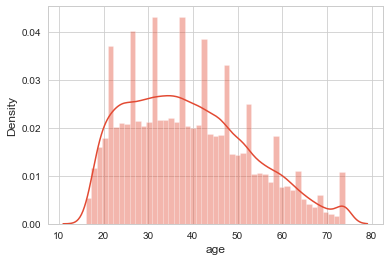

In [2781]:
sns.distplot(mortgage_df['age'])
plt.show()

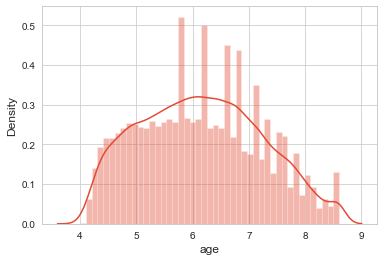

In [2782]:
sns.distplot(np.sqrt(mortgage_df['age']))
plt.show()

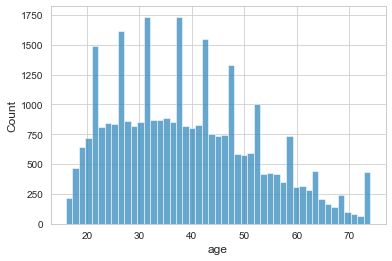

In [2783]:
sns.histplot(mortgage_df['age'])
plt.show()

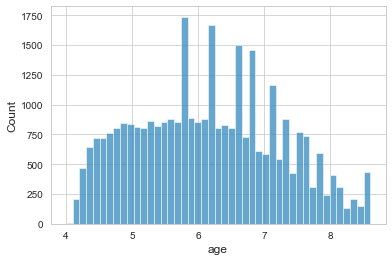

In [2784]:
sns.histplot(np.sqrt(mortgage_df['age']))
plt.show()

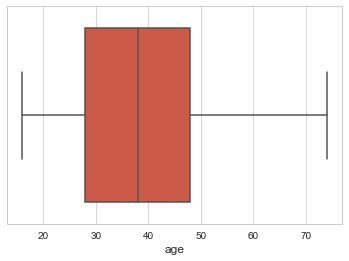

In [2785]:
sns.boxplot(mortgage_df['age'])
plt.show()

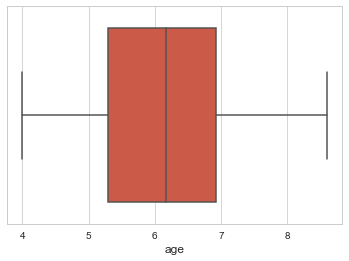

In [2786]:
sns.boxplot(np.sqrt(mortgage_df['age']))
plt.show()

In [2787]:
mortgage_df['age_deskewed'] = np.sqrt(mortgage_df['age'])

In [2788]:
mortgage_df.head()

,town,hours_per_week,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic,age,town_freq_encode,salary_in_gbp,z-score,salary_in_gbp_deskewed,net_profit,net_profit_deskewed,employement_duration_years,employement_duration_years_deskewed,demographic_characteristic_deskewed,age_deskewed
0,Edinburgh,40,1,1,Christianity,Not-in-family,White,United Kingdom,State-gov,77516,39,0.599582,18109.00,-0.003451,134.569685,2174,46.626173,20.50,4.527693,278.416954,6.244998
1,Leeds,13,1,1,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311,50,0.046958,16945.00,0.802401,130.172962,0,0.000000,22.67,4.761302,288.636450,7.071068
2,Edinburgh,40,1,1,Christianity,Not-in-family,White,United Kingdom,Private,215646,39,0.599582,37953.24,-0.003451,194.815913,0,0.000000,14.42,3.797368,464.377002,6.244998
3,Edinburgh,40,1,1,Christianity,Husband,Black,United Kingdom,Private,234721,53,0.599582,19087.00,1.022179,138.155709,0,0.000000,22.67,4.761302,484.480134,7.280110
4,Swindon,40,1,0,Christianity,Wife,Black,Sweden,Private,338409,28,0.161482,32898.00,-0.809304,181.378058,0,0.000000,3.50,1.870829,581.729318,5.291503


In [2789]:
freq = mortgage_df.groupby('religion').size()/len(mortgage_df)  
# mapping values to dataframe
mortgage_df.loc[:, "{}_freq_encode".format('religion')] = mortgage_df['religion'].map(freq)  
# drop original column.
mortgage_df = mortgage_df.drop(['religion'], axis = 1) 
mortgage_df.head()

,town,hours_per_week,new_mortgage,sex,relationship,race,native_country,workclass,demographic_characteristic,age,town_freq_encode,salary_in_gbp,z-score,salary_in_gbp_deskewed,net_profit,net_profit_deskewed,employement_duration_years,employement_duration_years_deskewed,demographic_characteristic_deskewed,age_deskewed,religion_freq_encode
0,Edinburgh,40,1,1,Not-in-family,White,United Kingdom,State-gov,77516,39,0.599582,18109.00,-0.003451,134.569685,2174,46.626173,20.50,4.527693,278.416954,6.244998,0.804736
1,Leeds,13,1,1,Husband,White,United Kingdom,Self-emp-not-inc,83311,50,0.046958,16945.00,0.802401,130.172962,0,0.000000,22.67,4.761302,288.636450,7.071068,0.804736
2,Edinburgh,40,1,1,Not-in-family,White,United Kingdom,Private,215646,39,0.599582,37953.24,-0.003451,194.815913,0,0.000000,14.42,3.797368,464.377002,6.244998,0.804736
3,Edinburgh,40,1,1,Husband,Black,United Kingdom,Private,234721,53,0.599582,19087.00,1.022179,138.155709,0,0.000000,22.67,4.761302,484.480134,7.280110,0.804736
4,Swindon,40,1,0,Wife,Black,Sweden,Private,338409,28,0.161482,32898.00,-0.809304,181.378058,0,0.000000,3.50,1.870829,581.729318,5.291503,0.804736


In [2790]:
freq = mortgage_df.groupby('relationship').size()/len(mortgage_df)  
# mapping values to dataframe
mortgage_df.loc[:, "{}_freq_encode".format('relationship')] = mortgage_df['relationship'].map(freq)  
# drop original column.
mortgage_df = mortgage_df.drop(['relationship'], axis = 1) 
mortgage_df.head()

,town,hours_per_week,new_mortgage,sex,race,native_country,workclass,demographic_characteristic,age,town_freq_encode,salary_in_gbp,z-score,salary_in_gbp_deskewed,net_profit,net_profit_deskewed,employement_duration_years,employement_duration_years_deskewed,demographic_characteristic_deskewed,age_deskewed,religion_freq_encode,relationship_freq_encode
0,Edinburgh,40,1,1,White,United Kingdom,State-gov,77516,39,0.599582,18109.00,-0.003451,134.569685,2174,46.626173,20.50,4.527693,278.416954,6.244998,0.804736,0.255060
1,Leeds,13,1,1,White,United Kingdom,Self-emp-not-inc,83311,50,0.046958,16945.00,0.802401,130.172962,0,0.000000,22.67,4.761302,288.636450,7.071068,0.804736,0.405178
2,Edinburgh,40,1,1,White,United Kingdom,Private,215646,39,0.599582,37953.24,-0.003451,194.815913,0,0.000000,14.42,3.797368,464.377002,6.244998,0.804736,0.255060
3,Edinburgh,40,1,1,Black,United Kingdom,Private,234721,53,0.599582,19087.00,1.022179,138.155709,0,0.000000,22.67,4.761302,484.480134,7.280110,0.804736,0.405178
4,Swindon,40,1,0,Black,Sweden,Private,338409,28,0.161482,32898.00,-0.809304,181.378058,0,0.000000,3.50,1.870829,581.729318,5.291503,0.804736,0.048156


In [2791]:
freq = mortgage_df.groupby('race').size()/len(mortgage_df)  
# mapping values to dataframe
mortgage_df.loc[:, "{}_freq_encode".format('race')] = mortgage_df['race'].map(freq)  
# drop original column.
mortgage_df = mortgage_df.drop(['race'], axis = 1) 
mortgage_df.head()

,town,hours_per_week,new_mortgage,sex,native_country,workclass,demographic_characteristic,age,town_freq_encode,salary_in_gbp,z-score,salary_in_gbp_deskewed,net_profit,net_profit_deskewed,employement_duration_years,employement_duration_years_deskewed,demographic_characteristic_deskewed,age_deskewed,religion_freq_encode,relationship_freq_encode,race_freq_encode
0,Edinburgh,40,1,1,United Kingdom,State-gov,77516,39,0.599582,18109.00,-0.003451,134.569685,2174,46.626173,20.50,4.527693,278.416954,6.244998,0.804736,0.255060,0.854274
1,Leeds,13,1,1,United Kingdom,Self-emp-not-inc,83311,50,0.046958,16945.00,0.802401,130.172962,0,0.000000,22.67,4.761302,288.636450,7.071068,0.804736,0.405178,0.854274
2,Edinburgh,40,1,1,United Kingdom,Private,215646,39,0.599582,37953.24,-0.003451,194.815913,0,0.000000,14.42,3.797368,464.377002,6.244998,0.804736,0.255060,0.854274
3,Edinburgh,40,1,1,United Kingdom,Private,234721,53,0.599582,19087.00,1.022179,138.155709,0,0.000000,22.67,4.761302,484.480134,7.280110,0.804736,0.405178,0.095943
4,Swindon,40,1,0,Sweden,Private,338409,28,0.161482,32898.00,-0.809304,181.378058,0,0.000000,3.50,1.870829,581.729318,5.291503,0.804736,0.048156,0.095943


In [2792]:
freq = mortgage_df.groupby('native_country').size()/len(mortgage_df)  
# mapping values to dataframe
mortgage_df.loc[:, "{}_freq_encode".format('native_country')] = mortgage_df['native_country'].map(freq)  
# drop original column.
mortgage_df = mortgage_df.drop(['native_country'], axis = 1) 
mortgage_df.head()

,town,hours_per_week,new_mortgage,sex,workclass,demographic_characteristic,age,town_freq_encode,salary_in_gbp,z-score,salary_in_gbp_deskewed,net_profit,net_profit_deskewed,employement_duration_years,employement_duration_years_deskewed,demographic_characteristic_deskewed,age_deskewed,religion_freq_encode,relationship_freq_encode,race_freq_encode,native_country_freq_encode
0,Edinburgh,40,1,1,State-gov,77516,39,0.599582,18109.00,-0.003451,134.569685,2174,46.626173,20.50,4.527693,278.416954,6.244998,0.804736,0.255060,0.854274,0.895857
1,Leeds,13,1,1,Self-emp-not-inc,83311,50,0.046958,16945.00,0.802401,130.172962,0,0.000000,22.67,4.761302,288.636450,7.071068,0.804736,0.405178,0.854274,0.895857
2,Edinburgh,40,1,1,Private,215646,39,0.599582,37953.24,-0.003451,194.815913,0,0.000000,14.42,3.797368,464.377002,6.244998,0.804736,0.255060,0.854274,0.895857
3,Edinburgh,40,1,1,Private,234721,53,0.599582,19087.00,1.022179,138.155709,0,0.000000,22.67,4.761302,484.480134,7.280110,0.804736,0.405178,0.095943,0.895857
4,Swindon,40,1,0,Private,338409,28,0.161482,32898.00,-0.809304,181.378058,0,0.000000,3.50,1.870829,581.729318,5.291503,0.804736,0.048156,0.095943,0.002918


In [2793]:
freq = mortgage_df.groupby('workclass').size()/len(mortgage_df)  
# mapping values to dataframe
mortgage_df.loc[:, "{}_freq_encode".format('workclass')] = mortgage_df['workclass'].map(freq)  
# drop original column.
mortgage_df = mortgage_df.drop(['workclass'], axis = 1) 
mortgage_df.head()

,town,hours_per_week,new_mortgage,sex,demographic_characteristic,age,town_freq_encode,salary_in_gbp,z-score,salary_in_gbp_deskewed,net_profit,net_profit_deskewed,employement_duration_years,employement_duration_years_deskewed,demographic_characteristic_deskewed,age_deskewed,religion_freq_encode,relationship_freq_encode,race_freq_encode,native_country_freq_encode,workclass_freq_encode
0,Edinburgh,40,1,1,77516,39,0.599582,18109.00,-0.003451,134.569685,2174,46.626173,20.50,4.527693,278.416954,6.244998,0.804736,0.255060,0.854274,0.895857,0.039864
1,Leeds,13,1,1,83311,50,0.046958,16945.00,0.802401,130.172962,0,0.000000,22.67,4.761302,288.636450,7.071068,0.804736,0.405178,0.854274,0.895857,0.078038
2,Edinburgh,40,1,1,215646,39,0.599582,37953.24,-0.003451,194.815913,0,0.000000,14.42,3.797368,464.377002,6.244998,0.804736,0.255060,0.854274,0.895857,0.697030
3,Edinburgh,40,1,1,234721,53,0.599582,19087.00,1.022179,138.155709,0,0.000000,22.67,4.761302,484.480134,7.280110,0.804736,0.405178,0.095943,0.895857,0.697030
4,Swindon,40,1,0,338409,28,0.161482,32898.00,-0.809304,181.378058,0,0.000000,3.50,1.870829,581.729318,5.291503,0.804736,0.048156,0.095943,0.002918,0.697030


In [2794]:
def plot_boxplot(numerical_columns, data):
    plt.style.use('ggplot')
    sns.set_style('whitegrid')
    plt.figure(figsize = (20,10))
    i=0

    for feature in numerical_columns:
        i += 1
        plt.subplot(3,2,i)
        plt.boxplot(x = feature, data = data)

    plt.tight_layout()    
    plt.show() 

In [2795]:
def plot_distplot(numerical_columns, data):
    plt.figure(figsize = (20,10))

    i=0

    for feature in numerical_columns:
        i += 1
        plt.subplot(2,3,i)
        sns.distplot(data[feature])

    plt.tight_layout()    
    plt.show()

In [2796]:
def plot_histplot(numerical_columns, data):
    plt.figure(figsize = (20,10))

    i=0

    for feature in numerical_columns:
        i += 1
        plt.subplot(2,3,i)
        sns.histplot(data[feature])

    plt.tight_layout()    
    plt.show()

In [2797]:
mortgage_df.skew()

hours_per_week                        -0.474608
new_mortgage                           0.000000
sex                                   -0.719293
demographic_characteristic             0.796028
age                                    0.476283
town_freq_encode                      -0.492361
salary_in_gbp                          1.696652
z-score                                0.557799
salary_in_gbp_deskewed                 0.748551
net_profit                             3.243802
net_profit_deskewed                    3.176270
employement_duration_years             1.484153
employement_duration_years_deskewed    0.623827
demographic_characteristic_deskewed   -0.000167
age_deskewed                           0.160855
religion_freq_encode                  -1.547400
relationship_freq_encode              -0.255007
race_freq_encode                      -2.018325
native_country_freq_encode            -2.592550
workclass_freq_encode                 -0.861002
dtype: float64

In [2798]:
mortgage_df.drop(['z-score','net_profit'],inplace=True, axis=1)

In [2799]:
mortgage_df.head()

,town,hours_per_week,new_mortgage,sex,demographic_characteristic,age,town_freq_encode,salary_in_gbp,salary_in_gbp_deskewed,net_profit_deskewed,employement_duration_years,employement_duration_years_deskewed,demographic_characteristic_deskewed,age_deskewed,religion_freq_encode,relationship_freq_encode,race_freq_encode,native_country_freq_encode,workclass_freq_encode
0,Edinburgh,40,1,1,77516,39,0.599582,18109.00,134.569685,46.626173,20.50,4.527693,278.416954,6.244998,0.804736,0.255060,0.854274,0.895857,0.039864
1,Leeds,13,1,1,83311,50,0.046958,16945.00,130.172962,0.000000,22.67,4.761302,288.636450,7.071068,0.804736,0.405178,0.854274,0.895857,0.078038
2,Edinburgh,40,1,1,215646,39,0.599582,37953.24,194.815913,0.000000,14.42,3.797368,464.377002,6.244998,0.804736,0.255060,0.854274,0.895857,0.697030
3,Edinburgh,40,1,1,234721,53,0.599582,19087.00,138.155709,0.000000,22.67,4.761302,484.480134,7.280110,0.804736,0.405178,0.095943,0.895857,0.697030
4,Swindon,40,1,0,338409,28,0.161482,32898.00,181.378058,0.000000,3.50,1.870829,581.729318,5.291503,0.804736,0.048156,0.095943,0.002918,0.697030


In [2800]:
columns = ['hours_per_week','demographic_characteristic_deskewed','age_deskewed','salary_in_gbp_deskewed','employement_duration_years_deskewed']
scaler = StandardScaler()
scaled_df = scaler.fit_transform(mortgage_df[columns])
scaled_df = pd.DataFrame(scaled_df)
columns_scaled = ['hours_per_week_scaled','demographic_characteristic_scaled','age_scaled','salary_in_gbp_scaled','employement_duration_years_scaled']
scaled_df.columns = columns_scaled
scaled_df.head()

,hours_per_week_scaled,demographic_characteristic_scaled,age_scaled,salary_in_gbp_scaled,employement_duration_years_scaled
0,-0.009745,-1.192333,0.087604,-0.634950,2.147222
1,-2.381021,-1.105099,0.855624,-0.717146,2.347372
2,-0.009745,0.395028,0.087604,0.491333,1.521501
3,-0.009745,0.566629,1.049976,-0.567911,2.347372
4,-0.009745,1.396751,-0.798886,0.240117,-0.129101


In [2801]:
scaled_df.shape

(32561, 5)

In [2802]:
mortgage_df.isnull().sum()

town                                      0
hours_per_week                            0
new_mortgage                              0
sex                                       0
demographic_characteristic                0
age                                       0
town_freq_encode                          0
salary_in_gbp                             0
salary_in_gbp_deskewed                    0
net_profit_deskewed                    1519
employement_duration_years                0
employement_duration_years_deskewed       0
demographic_characteristic_deskewed       0
age_deskewed                              0
religion_freq_encode                      0
relationship_freq_encode                  0
race_freq_encode                          0
native_country_freq_encode                0
workclass_freq_encode                     0
dtype: int64

In [2803]:
scaled_df.isnull().sum()

hours_per_week_scaled                0
demographic_characteristic_scaled    0
age_scaled                           0
salary_in_gbp_scaled                 0
employement_duration_years_scaled    0
dtype: int64

In [2582]:
mortgage_df = pd.concat([mortgage_df, scaled_df], axis=1)
#mortgage_df_cleaned.drop(['hours_per_week','demographic_characteristic','age','salary_in_gbp','employement_duration_years'],axis=1,inplace=True)
mortgage_df.head()

,town,hours_per_week,new_mortgage,sex,demographic_characteristic,age,town_freq_encode,salary_in_gbp,salary_in_gbp_deskewed,net_profit_deskewed,employement_duration_years,employement_duration_years_deskewed,demographic_characteristic_deskewed,age_deskewed,religion_freq_encode,relationship_freq_encode,race_freq_encode,native_country_freq_encode,workclass_freq_encode,hours_per_week_scaled,demographic_characteristic_scaled,age_scaled,salary_in_gbp_scaled,employement_duration_years_scaled
0,Edinburgh,40,1,1,77516,39,0.599582,18109.00,134.569685,46.626173,20.50,4.527693,278.416954,6.244998,0.804736,0.255060,0.854274,0.895857,0.039864,-0.009745,-1.192333,0.087604,-0.634950,2.147222
1,Leeds,13,1,1,83311,50,0.046958,16945.00,130.172962,0.000000,22.67,4.761302,288.636450,7.071068,0.804736,0.405178,0.854274,0.895857,0.078038,-2.381021,-1.105099,0.855624,-0.717146,2.347372
2,Edinburgh,40,1,1,215646,39,0.599582,37953.24,194.815913,0.000000,14.42,3.797368,464.377002,6.244998,0.804736,0.255060,0.854274,0.895857,0.697030,-0.009745,0.395028,0.087604,0.491333,1.521501
3,Edinburgh,40,1,1,234721,53,0.599582,19087.00,138.155709,0.000000,22.67,4.761302,484.480134,7.280110,0.804736,0.405178,0.095943,0.895857,0.697030,-0.009745,0.566629,1.049976,-0.567911,2.347372
4,Swindon,40,1,0,338409,28,0.161482,32898.00,181.378058,0.000000,3.50,1.870829,581.729318,5.291503,0.804736,0.048156,0.095943,0.002918,0.697030,-0.009745,1.396751,-0.798886,0.240117,-0.129101


In [2583]:
columns_for_kmeans = ['new_mortgage','sex', 'town_freq_encode','religion_freq_encode',
                              'race_freq_encode','native_country_freq_encode',
                              'workclass_freq_encode','demographic_characteristic_scaled','age_scaled',
                             'salary_in_gbp_scaled','employement_duration_years_scaled']

kmeans_df = mortgage_df[columns_for_kmeans]

In [2584]:
kmeans_df.shape

(32561, 11)

In [2585]:
kmeans_df.isnull().sum()

new_mortgage                         0
sex                                  0
town_freq_encode                     0
religion_freq_encode                 0
race_freq_encode                     0
native_country_freq_encode           0
workclass_freq_encode                0
demographic_characteristic_scaled    0
age_scaled                           0
salary_in_gbp_scaled                 0
employement_duration_years_scaled    0
dtype: int64

In [2586]:
kmeans_df.describe()

,new_mortgage,sex,town_freq_encode,religion_freq_encode,race_freq_encode,native_country_freq_encode,workclass_freq_encode,demographic_characteristic_scaled,age_scaled,salary_in_gbp_scaled,employement_duration_years_scaled
count,32561.0,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,3.256100e+04,3.256100e+04,3.256100e+04,3.256100e+04
mean,1.0,0.669205,0.390990,0.660554,0.740167,0.803485,0.502886,-3.148490e-17,-2.078672e-16,-3.384712e-15,-9.656189e-18
std,0.0,0.470506,0.259056,0.293080,0.276599,0.270940,0.294637,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00
min,1.0,0.000000,0.000031,0.004392,0.008323,0.000031,0.000215,-2.622794e+00,-1.999632e+00,-3.150686e+00,-1.731972e+00
25%,1.0,0.000000,0.161482,0.804736,0.854274,0.895857,0.078038,-6.388358e-01,-7.988865e-01,-5.811327e-01,-7.438958e-01
50%,1.0,1.000000,0.599582,0.804736,0.854274,0.895857,0.697030,3.604647e-02,1.268299e-02,-2.839332e-01,-2.065352e-01
75%,1.0,1.000000,0.599582,0.804736,0.854274,0.895857,0.697030,5.871043e-01,7.227986e-01,3.166120e-01,6.408342e-01
max,1.0,1.000000,0.599582,0.804736,0.854274,0.895857,0.697030,2.527467e+00,2.279275e+00,2.385659e+00,2.347372e+00


In [2587]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [2588]:
#res = []
#for i in range(1,20):
#    res.append(hopkins(mortgage_df_cleaned))
#    
#sum(res)/len(res)

In [2589]:
kmeans_df.shape

(32561, 11)

In [2590]:
ssd = []
cluster_values = [2,3,4,5,6,7,8]

for chosen_cluster in cluster_values:
    kmeans = KMeans(n_clusters = chosen_cluster, max_iter=40)
    kmeans.fit(kmeans_df)
    
    ssd.append(kmeans.inertia_)

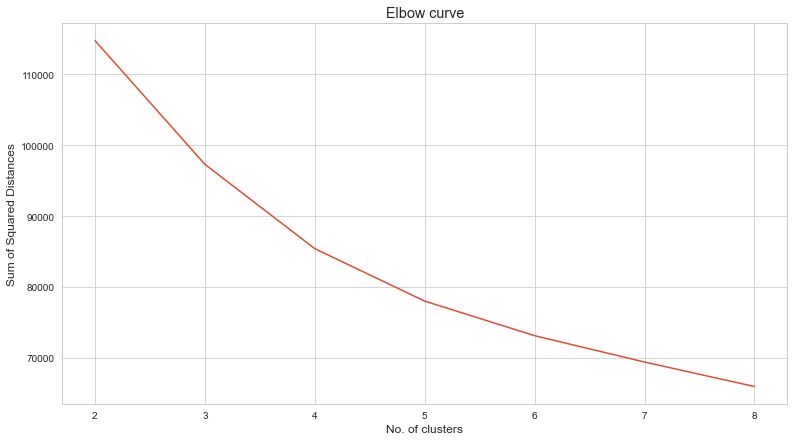

In [2591]:
plt.figure(figsize = (13, 7))
sns.lineplot(x= cluster_values, y =ssd)
plt.xlabel('No. of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow curve')
plt.savefig('Elbow curve - Mortgage')
plt.show()

In [2437]:
scores = []
cluster_values = [2,3,4,5,6,7,8]

for chosen_cluster in cluster_values:
    
    kmeans = KMeans(n_clusters = chosen_cluster, max_iter = 50)
    kmeans.fit(kmeans_df)
    
    cluster_labels = kmeans.labels_
    
    sihouette_avg = silhouette_score(kmeans_df, cluster_labels)
    print('For n clusters {0}, the silhouette score is {1}'.format(chosen_cluster, sihouette_avg))

For n clusters 2, the silhouette score is 0.21872384010319842
For n clusters 3, the silhouette score is 0.23223008580757654
For n clusters 4, the silhouette score is 0.1940890715012329
For n clusters 5, the silhouette score is 0.1791252417173892
For n clusters 6, the silhouette score is 0.17272437121015805
For n clusters 7, the silhouette score is 0.1605279474005137
For n clusters 8, the silhouette score is 0.1596665775092637


In [2670]:
kmeans = KMeans(n_clusters = 3, max_iter = 50, random_state = 1)
kmeans.fit(kmeans_df)

KMeans(max_iter=50, n_clusters=3, random_state=1)

In [2671]:
kmeans_df.head()

,new_mortgage,sex,town_freq_encode,religion_freq_encode,race_freq_encode,native_country_freq_encode,workclass_freq_encode,demographic_characteristic_scaled,age_scaled,salary_in_gbp_scaled,employement_duration_years_scaled,Cluster Id - KMeans
0,1,1,0.599582,0.804736,0.854274,0.895857,0.039864,-1.192333,0.087604,-0.634950,2.147222,3
1,1,1,0.046958,0.804736,0.854274,0.895857,0.078038,-1.105099,0.855624,-0.717146,2.347372,3
2,1,1,0.599582,0.804736,0.854274,0.895857,0.697030,0.395028,0.087604,0.491333,1.521501,3
3,1,1,0.599582,0.804736,0.095943,0.895857,0.697030,0.566629,1.049976,-0.567911,2.347372,3
4,1,0,0.161482,0.804736,0.095943,0.002918,0.697030,1.396751,-0.798886,0.240117,-0.129101,1


In [2672]:
kmeans_df['Cluster Id - KMeans'] = kmeans.labels_
kmeans_df.head()

,new_mortgage,sex,town_freq_encode,religion_freq_encode,race_freq_encode,native_country_freq_encode,workclass_freq_encode,demographic_characteristic_scaled,age_scaled,salary_in_gbp_scaled,employement_duration_years_scaled,Cluster Id - KMeans
0,1,1,0.599582,0.804736,0.854274,0.895857,0.039864,-1.192333,0.087604,-0.634950,2.147222,2
1,1,1,0.046958,0.804736,0.854274,0.895857,0.078038,-1.105099,0.855624,-0.717146,2.347372,2
2,1,1,0.599582,0.804736,0.854274,0.895857,0.697030,0.395028,0.087604,0.491333,1.521501,2
3,1,1,0.599582,0.804736,0.095943,0.895857,0.697030,0.566629,1.049976,-0.567911,2.347372,2
4,1,0,0.161482,0.804736,0.095943,0.002918,0.697030,1.396751,-0.798886,0.240117,-0.129101,1


In [2673]:
mortgage_df.shape

(32561, 25)

In [2674]:
kmeans_df.shape

(32561, 12)

In [2675]:
mortgage_df['Cluster Id - KMeans'] = kmeans.labels_

In [2676]:
mortgage_load_df.head()

,full_name,dob,town,paye,salary_band,years_with_employer,months_with_employer,hours_per_week,capital_gain,capital_loss,new_mortgage,sex,religion,relationship,race,native_country,workclass,demographic_characteristic
0,Mr. Dale Coles,1979-05-10,Edinburgh,53791313,£18109 yearly,20,6,40,2174,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,State-gov,77516
1,Joel Allen,1968-07-06,Leeds,24005258,£16945 yearly,28,1,13,0,0,Yes,Male,Christianity,Husband,White,United Kingdom,Self-emp-not-inc,83311
2,Mr. Craig Marc Davis,1979-02-10,Edinburgh,44124649,£729.87 pw,14,5,40,0,0,Yes,Male,Christianity,Not-in-family,White,United Kingdom,Private,215646
3,Mr. Brandon Thornton,1965-10-20,Edinburgh,85701281,£19087 yearly,32,6,40,0,0,Yes,Male,Christianity,Husband,Black,United Kingdom,Private,234721
4,Miss Brett Carol Fletcher,1990-02-20,Swindon,BR442000,£2741.5 per month,3,6,40,0,0,Yes,Female,Christianity,Wife,Black,Sweden,Private,338409


In [2677]:
mortgage_load_df.shape

(32561, 18)

In [2678]:
mortgage_df.head()

,town,hours_per_week,new_mortgage,sex,demographic_characteristic,age,town_freq_encode,salary_in_gbp,salary_in_gbp_deskewed,net_profit_deskewed,employement_duration_years,employement_duration_years_deskewed,demographic_characteristic_deskewed,age_deskewed,religion_freq_encode,relationship_freq_encode,race_freq_encode,native_country_freq_encode,workclass_freq_encode,hours_per_week_scaled,demographic_characteristic_scaled,age_scaled,salary_in_gbp_scaled,employement_duration_years_scaled,Cluster Id - KMeans
0,Edinburgh,40,1,1,77516,39,0.599582,18109.00,134.569685,46.626173,20.50,4.527693,278.416954,6.244998,0.804736,0.255060,0.854274,0.895857,0.039864,-0.009745,-1.192333,0.087604,-0.634950,2.147222,2
1,Leeds,13,1,1,83311,50,0.046958,16945.00,130.172962,0.000000,22.67,4.761302,288.636450,7.071068,0.804736,0.405178,0.854274,0.895857,0.078038,-2.381021,-1.105099,0.855624,-0.717146,2.347372,2
2,Edinburgh,40,1,1,215646,39,0.599582,37953.24,194.815913,0.000000,14.42,3.797368,464.377002,6.244998,0.804736,0.255060,0.854274,0.895857,0.697030,-0.009745,0.395028,0.087604,0.491333,1.521501,2
3,Edinburgh,40,1,1,234721,53,0.599582,19087.00,138.155709,0.000000,22.67,4.761302,484.480134,7.280110,0.804736,0.405178,0.095943,0.895857,0.697030,-0.009745,0.566629,1.049976,-0.567911,2.347372,2
4,Swindon,40,1,0,338409,28,0.161482,32898.00,181.378058,0.000000,3.50,1.870829,581.729318,5.291503,0.804736,0.048156,0.095943,0.002918,0.697030,-0.009745,1.396751,-0.798886,0.240117,-0.129101,1


In [2679]:
mortgage_df.shape

(32561, 25)

In [2680]:
cluster_analysis = pd.concat([mortgage_load_df[['full_name','religion','demographic_characteristic','relationship','race','workclass','town']],
                              mortgage_df[['age','salary_in_gbp','sex','employement_duration_years','Cluster Id - KMeans']]],axis=1)
#cluster_analysis = pd.concat([mortgage_load_df,temp1],axis=1)
cluster_analysis.head()

,full_name,religion,demographic_characteristic,relationship,race,workclass,town,age,salary_in_gbp,sex,employement_duration_years,Cluster Id - KMeans
0,Mr. Dale Coles,Christianity,77516,Not-in-family,White,State-gov,Edinburgh,39,18109.00,1,20.50,2
1,Joel Allen,Christianity,83311,Husband,White,Self-emp-not-inc,Leeds,50,16945.00,1,22.67,2
2,Mr. Craig Marc Davis,Christianity,215646,Not-in-family,White,Private,Edinburgh,39,37953.24,1,14.42,2
3,Mr. Brandon Thornton,Christianity,234721,Husband,Black,Private,Edinburgh,53,19087.00,1,22.67,2
4,Miss Brett Carol Fletcher,Christianity,338409,Wife,Black,Private,Swindon,28,32898.00,0,3.50,1


In [2681]:
cluster_analysis.shape

(32561, 12)

In [2682]:
cluster_analysis['Cluster Id - KMeans'].value_counts()

1    16318
2    11447
0     4796
Name: Cluster Id - KMeans, dtype: int64

In [2683]:
cluster_0 = cluster_analysis[cluster_analysis['Cluster Id - KMeans'] == 0]
cluster_1 = cluster_analysis[cluster_analysis['Cluster Id - KMeans'] == 1]
cluster_2 = cluster_analysis[cluster_analysis['Cluster Id - KMeans'] == 2]

In [2684]:
print(cluster_0.shape)
print(cluster_1.shape)
print(cluster_2.shape)

(4796, 12)
(16318, 12)
(11447, 12)


In [2685]:
print(cluster_0['age'].mean())
print(cluster_1['age'].mean())
print(cluster_2['age'].mean())

41.85321100917431
29.91016055889202
50.730759150869225


In [2687]:
print(cluster_0['relationship'].value_counts())
print('-----------')
print(cluster_1['relationship'].value_counts())
print('-----------')
print(cluster_2['relationship'].value_counts())

Husband           1967
Not-in-family     1185
Own-child          724
Unmarried          533
Wife               249
Other-relative     138
Name: relationship, dtype: int64
-----------
Husband           6550
Not-in-family     4168
Own-child         2548
Unmarried         1754
Wife               815
Other-relative     483
Name: relationship, dtype: int64
-----------
Husband           4676
Not-in-family     2952
Own-child         1796
Unmarried         1159
Wife               504
Other-relative     360
Name: relationship, dtype: int64


In [2688]:
print(cluster_0['workclass'].value_counts())
print('-----------')
print(cluster_1['workclass'].value_counts())
print('-----------')
print(cluster_2['workclass'].value_counts())

Private             3339
Self-emp-not-inc     348
Local-gov            345
?                    257
State-gov            198
Self-emp-inc         171
Federal-gov          133
Without-pay            3
Never-worked           2
Name: workclass, dtype: int64
-----------
Private             11415
Self-emp-not-inc     1281
Local-gov             998
?                     915
State-gov             657
Self-emp-inc          559
Federal-gov           481
Without-pay             8
Never-worked            4
Name: workclass, dtype: int64
-----------
Private             7942
Self-emp-not-inc     912
Local-gov            750
?                    664
State-gov            443
Self-emp-inc         386
Federal-gov          346
Without-pay            3
Never-worked           1
Name: workclass, dtype: int64


In [2689]:
print(cluster_0['salary_in_gbp'].mean())
print(cluster_1['salary_in_gbp'].mean())
print(cluster_2['salary_in_gbp'].mean())

74440.27005754462
23217.757501117583
24647.208734891483
